### This notebook creates a map that displays military base locations that exceed EPA's PFAS guidelines of 4 parts per trillion (ppt) from webscraped data

In [1]:
import os
import pandas as pd
import plotly.express as px
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt

os.chdir(r'/Users/swilson/Library/CloudStorage/OneDrive-Personal/python/python notebooks/GitHub/Webscraping')
cwd = os.getcwd()
print("Current working directory is:", cwd)

Current working directory is: /Users/swilson/Library/CloudStorage/OneDrive-Personal/python/python notebooks/GitHub/Webscraping


In [2]:
#removing store magic and pulling data in via csv instead for GitHub
#lsmagic
#%store -r 
#exceed
#%store -r
#metadata_df

In [3]:
#exceed_geo = exceed.merge(metadata_df.rename({'InstallationName': 'FinalData.InstallationName'}, axis=1), on='FinalData.InstallationName', how='left', indicator=True)
#exceed_geo.head()
#exceed_geo.to_csv('exceed_geo_all.csv', index='False')
                        

In [4]:
url = 'https://github.com/plain-jane-gray/PFAS-webscrape/blob/main/exceed_geo_all.csv?raw=true'
exceed_geo = pd.read_csv(url)
exceed_geo.head()

,Unnamed: 0,FinalData.Id,FinalData.Component,FinalData.InstallationName,FinalData.InstallationType,FinalData.SampleDate,FinalData.AnalysisMethod,FinalData.AnalyteAbbrev,FinalData.FinalResult,MCLs,...,FinalData.TreatmentSystem,FinalData.PreOrPostTreatment,Id,DodComponentId,DodComponent,State,InstallationType,Latitude,Longitude,_merge
0,0,123477.0,Air Force,Air Force Plant 44,Active,2022-10-11T00:00:00-04:00,QSM_B15,PFOS,29.2,4,...,Yes,pre-treatment,24,5700,Air Force,Arizona,Active,32.221743,-110.926479,both
1,1,123501.0,Air Force,Air Force Plant 44,Active,2022-10-11T00:00:00-04:00,QSM_B15,PFOS,28.5,4,...,Yes,pre-treatment,24,5700,Air Force,Arizona,Active,32.221743,-110.926479,both
2,2,24112.0,Air Force,Arnold AFB,Active,2021-12-14T00:00:00-05:00,QSM_B15,PFOS,13.9,4,...,No,NaN,41,5700,Air Force,Tennessee,Active,35.398810,-86.078066,both
3,3,24113.0,Air Force,Arnold AFB,Active,2021-12-14T00:00:00-05:00,QSM_B15,PFOA,39.2,4,...,No,NaN,41,5700,Air Force,Tennessee,Active,35.398810,-86.078066,both
4,4,24136.0,Air Force,Arnold AFB,Active,2021-12-14T00:00:00-05:00,QSM_B15,PFOS,14.3,4,...,No,NaN,41,5700,Air Force,Tennessee,Active,35.398810,-86.078066,both


In [5]:
#filterning to only needed columns and dropping duplicates
exceed_geo = exceed_geo[['FinalData.Component',
                         'FinalData.InstallationName',
                         'State',
                         'Latitude',
                         'Longitude']]

exceed_geo = exceed_geo.drop_duplicates()
exceed_geo.reset_index(drop=True, inplace=True)
exceed_geo

,FinalData.Component,FinalData.InstallationName,State,Latitude,Longitude
0,Air Force,Air Force Plant 44,Arizona,32.221743,-110.926479
1,Air Force,Arnold AFB,Tennessee,35.398810,-86.078066
2,Air Force,Avon Park Air Force Reserve,Florida,27.595670,-81.506186
3,Air Force,Biddle ANGB (formerly Horsham/Willow Grove ANG),Pennsylvania,40.208241,-75.148506
4,Navy,Brunswick NAS,Maine,43.890348,-69.934373
5,Navy,CID CORRY STATION,Florida,30.402749,-87.290008
6,Air Force,Eielson AFB,Alaska,64.665556,-147.101389
7,Air Force,Ellsworth AFB,South Dakota,44.140000,-103.070000
8,Army,Fort William Henry Harrison /JFHQ MT,Montana,46.630102,-112.087286
9,Air Force,Galena Forward Operating Location,Alaska,64.736452,-156.936453


In [6]:
#creating a geometry column from latitudes and longitudes for mapping in geopandas
exceed_geo_points = gpd.GeoDataFrame(exceed_geo, 
                                     geometry = gpd.points_from_xy(exceed_geo.Longitude, exceed_geo.Latitude))
exceed_geo_points

,FinalData.Component,FinalData.InstallationName,State,Latitude,Longitude,geometry
0,Air Force,Air Force Plant 44,Arizona,32.221743,-110.926479,POINT (-110.92648 32.22174)
1,Air Force,Arnold AFB,Tennessee,35.398810,-86.078066,POINT (-86.07807 35.39881)
2,Air Force,Avon Park Air Force Reserve,Florida,27.595670,-81.506186,POINT (-81.50619 27.59567)
3,Air Force,Biddle ANGB (formerly Horsham/Willow Grove ANG),Pennsylvania,40.208241,-75.148506,POINT (-75.14851 40.20824)
4,Navy,Brunswick NAS,Maine,43.890348,-69.934373,POINT (-69.93437 43.89035)
5,Navy,CID CORRY STATION,Florida,30.402749,-87.290008,POINT (-87.29001 30.40275)
6,Air Force,Eielson AFB,Alaska,64.665556,-147.101389,POINT (-147.10139 64.66556)
7,Air Force,Ellsworth AFB,South Dakota,44.140000,-103.070000,POINT (-103.07000 44.14000)
8,Army,Fort William Henry Harrison /JFHQ MT,Montana,46.630102,-112.087286,POINT (-112.08729 46.63010)
9,Air Force,Galena Forward Operating Location,Alaska,64.736452,-156.936453,POINT (-156.93645 64.73645)


In [7]:
#removing data for Alaska because it does not properly display
exceed_geo_points = exceed_geo_points[exceed_geo_points.State != 'Alaska']

In [8]:
#pulling in basemap, outline of states. Commented out due to GitHub issues. 
states = gpd.read_file('tl_2012_us_state.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [9]:
states.head()

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,1.663425e+10,1.167874e+10,+19.8097670,-155.5061027,2.419034e+06,3.268482e+10,"MULTIPOLYGON (((-17361760.204 2164544.588, -17..."
1,2,3,7,05,00068085,05,AR,Arkansas,00,G4000,A,1.347726e+11,2.959210e+09,+34.8955256,-092.4446262,2.656648e+06,2.053261e+11,"POLYGON ((-10515267.713 4101325.818, -10515269..."
2,3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,3.141611e+11,7.564385e+08,+34.4346843,-106.1316181,2.900368e+06,4.643927e+11,"POLYGON ((-12138963.727 4106855.170, -12138964..."
3,4,4,8,30,00767982,30,MT,Montana,00,G4000,A,3.769636e+11,3.868565e+09,+47.0511771,-109.6348174,4.607246e+06,8.201836e+11,"POLYGON ((-12727480.235 5886876.586, -12727567..."
4,5,1,2,36,01779796,36,NY,New York,00,G4000,A,1.220579e+11,1.923885e+10,+42.9133974,-075.5962723,3.212630e+06,2.637702e+11,"MULTIPOLYGON (((-8866092.533 5160809.769, -886..."


In [10]:
#viewing projection of states basemap to make sure it's WGS84
states.crs

<Projected CRS: PROJCS["Popular Visualisation CRS / Mercator",GEOG ...>
Name: Popular Visualisation CRS / Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

(-14220749.550385, -7123029.871115001, 2624847.4692150005, 6517261.706684997)

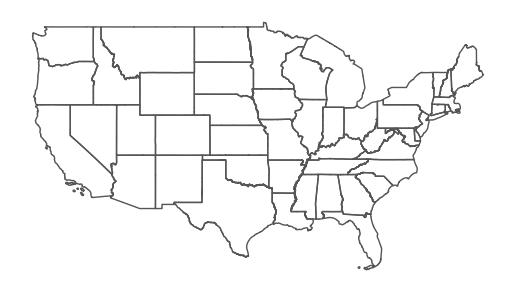

In [11]:
#only keeping continential US states for ease of viewing
states_50 = states[~states['STUSPS'].isin(['PR','AK','VI','HI','AS','GU','MP'])]
us_map = states_50.boundary.plot(color="#555555", linewidth=1)
us_map.axis('off')

In [12]:
#viewing the projection to make sure it's WGS84, same as the data
states_50.crs

<Projected CRS: PROJCS["Popular Visualisation CRS / Mercator",GEOG ...>
Name: Popular Visualisation CRS / Mercator
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [13]:
#ensuring projections of the points are also WGS84
exceed_geo_points.crs = "EPSG:4326" #WGs84 code
#make the same as US map. Should be WSG84, but just in case
exceed_geo_points = exceed_geo_points.to_crs(states_50.crs) 

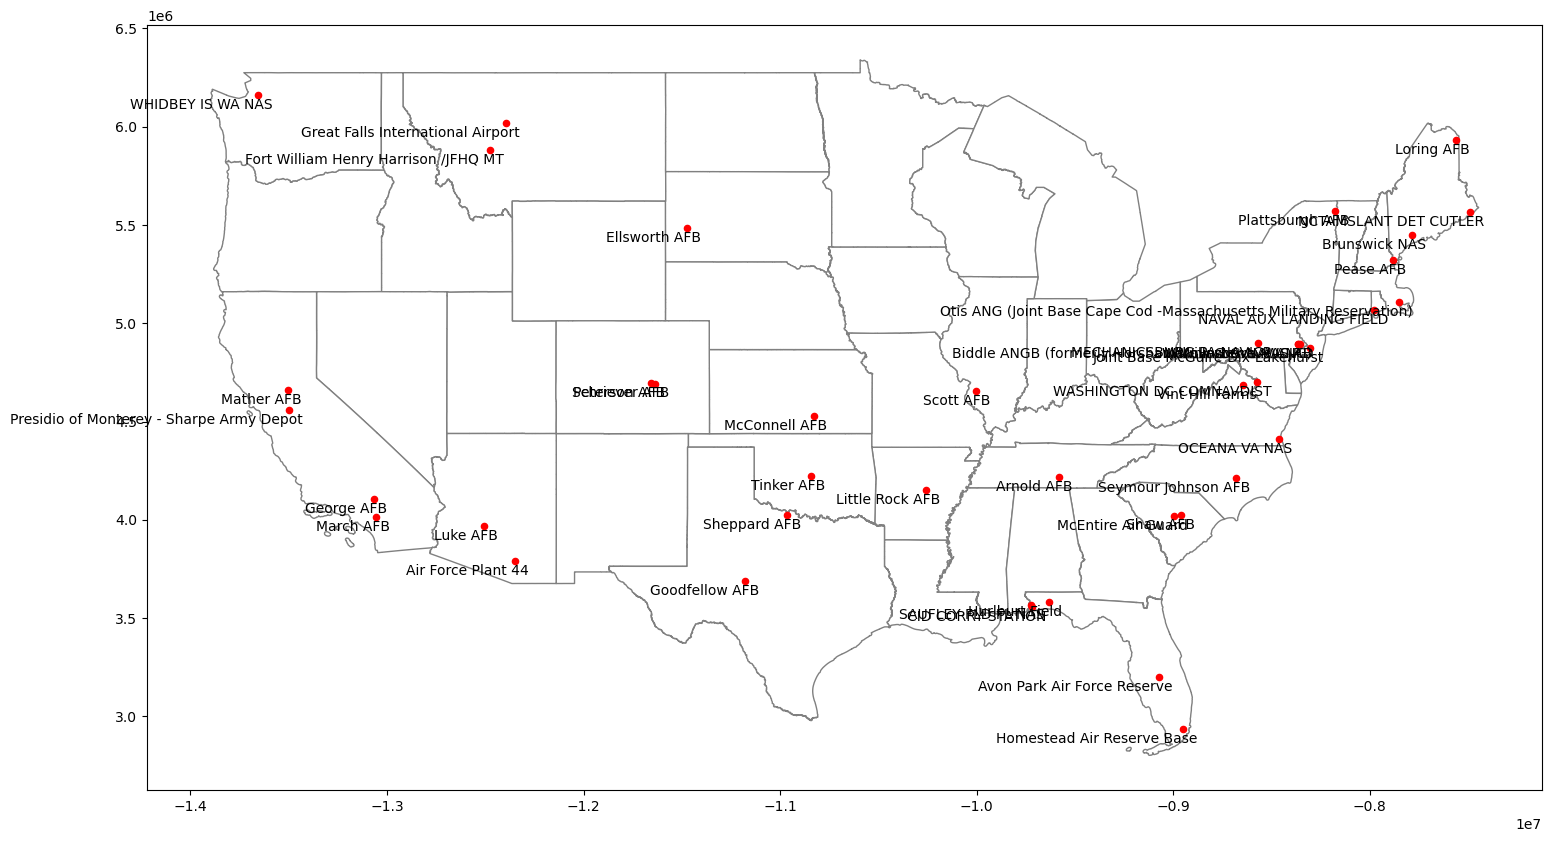

In [14]:

#typically I run %matplotlib qt to display a map of popout window. Displaying inline instead for GitHub. 
%matplotlib inline
from adjustText import adjust_text

base = states_50.plot(color='white', edgecolor='grey')

ax = exceed_geo_points.plot(ax=base, marker='o', color='red', markersize=20)

for x, y, label in zip(exceed_geo_points.geometry.x, exceed_geo_points.geometry.y, exceed_geo_points['FinalData.InstallationName']):
    ax.annotate(label, xy=(x, y), xytext=(10, -10), ha='right', fontsize=10, textcoords="offset points") #arrowprops=dict(facecolor='black', shrink=0.05)) # textcoords="offset pixels")

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18,12)
plt.show()